<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load" data-toc-modified-id="Load-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load</a></span></li><li><span><a href="#Plot-the-cost-and-stopping-criterion" data-toc-modified-id="Plot-the-cost-and-stopping-criterion-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Plot the cost and stopping criterion</a></span></li><li><span><a href="#Understanding-the-bumps-by-reconstructing-the-history-of-total-cost" data-toc-modified-id="Understanding-the-bumps-by-reconstructing-the-history-of-total-cost-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Understanding the bumps by reconstructing the history of total cost</a></span><ul class="toc-item"><li><span><a href="#Doing-this-with-the-already-implemented-routine" data-toc-modified-id="Doing-this-with-the-already-implemented-routine-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Doing this with the already implemented routine</a></span></li><li><span><a href="#Would-it-come-from-the-rebalancing-edges?" data-toc-modified-id="Would-it-come-from-the-rebalancing-edges?-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Would it come from the rebalancing edges?</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Understanding-the-bumps-by-comparing-their-origin-with-the-two-different-stopping-criteria" data-toc-modified-id="Understanding-the-bumps-by-comparing-their-origin-with-the-two-different-stopping-criteria-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Understanding the bumps by comparing their origin with the two different stopping criteria</a></span><ul class="toc-item"><li><span><a href="#Printing-the-stopping-criterion-and-the-total-cost-at-each-outer-iteration-for-sc-=-Duality-Gap" data-toc-modified-id="Printing-the-stopping-criterion-and-the-total-cost-at-each-outer-iteration-for-sc-=-Duality-Gap-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Printing the stopping criterion and the total cost at each outer iteration for sc = Duality Gap</a></span></li><li><span><a href="#Printing-the-stopping-criterion-and-the-total-cost-at-each-outer-iteration-for-sc-=-relative-progress" data-toc-modified-id="Printing-the-stopping-criterion-and-the-total-cost-at-each-outer-iteration-for-sc-=-relative-progress-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Printing the stopping criterion and the total cost at each outer iteration for sc = relative progress</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li></ul></div>

We have huge bumps for 25 nodes which prevents getting to the optimal point. How can we understand what is happening? 

# Load

In [1]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from result_analysis import plot_ri, print_final_flows, plot_cost_all_path

import pandas as pd

from result_analysis import plot_stop_and_cost

In [2]:
n_nodes=25
subfolder='ni_comparison_bumps'

In [126]:
path='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+subfolder

In [127]:
print(os.listdir(path))

['output_L_10000_ni_100_no_50_ev_0.pkl']


In [128]:
filename=os.listdir(path)[0]
print(filename)

with open(os.path.join(path, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_100_no_50_ev_0.pkl


In [129]:
len(opt_res)

50

In [132]:
np.maximum(0,2)

2

In [137]:
np.max([2,3,np.nan])

/Users/lucasfuentes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


nan

In [135]:
np.maximum(2,3,4)

TypeError: return arrays must be of ArrayType

In [130]:
len(G_FW)

51

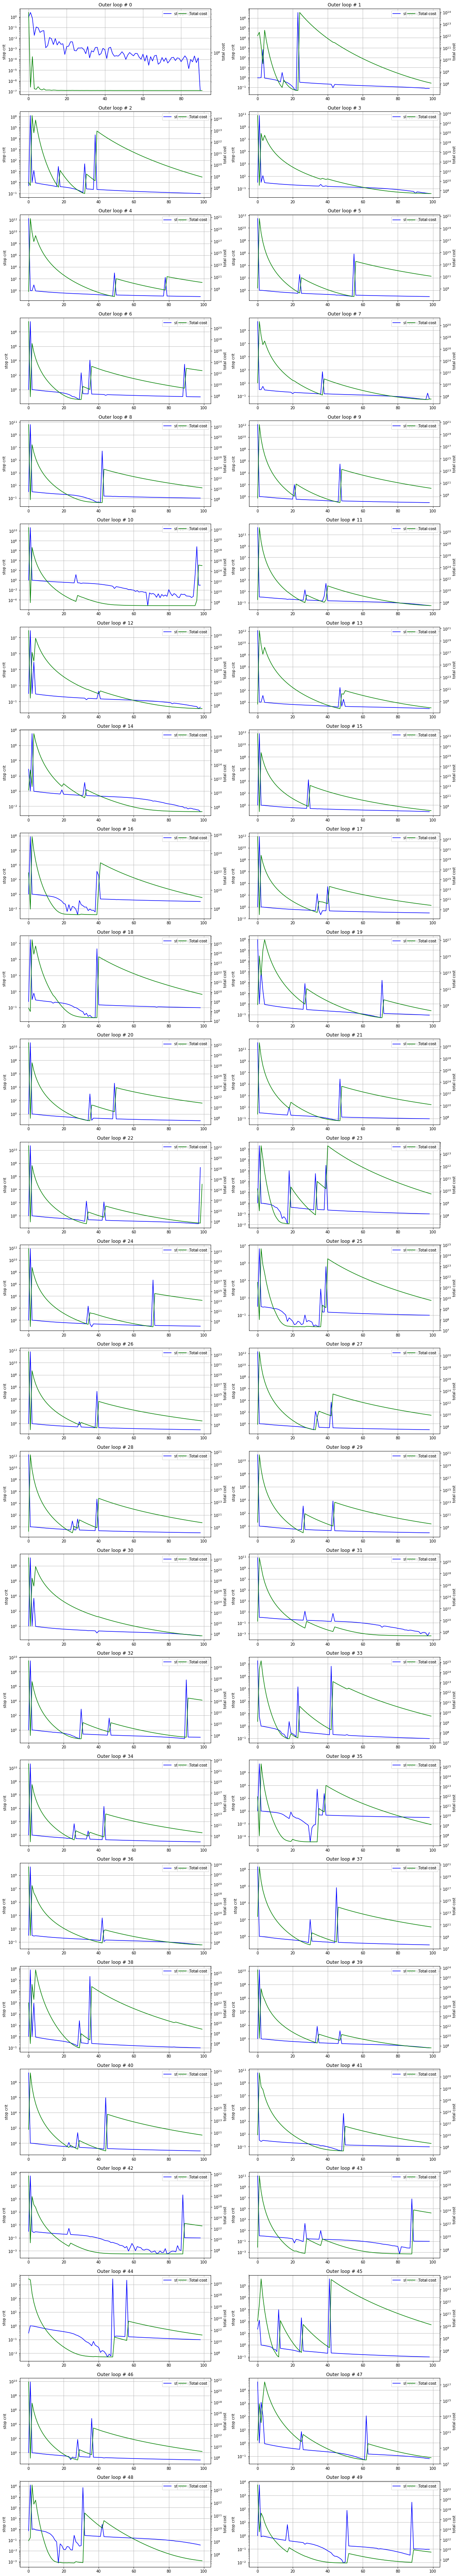

In [47]:
plot_stop_and_cost(opt_res)

We chose one outer iteration where the jumps are neat


In [109]:
ID=2

In [7]:
len(ri_FW)

51

In [110]:
G_ref=G_FW[ID]
opt_ref = opt_res[ID]
ri_ref=ri_FW[ID]

# Plot the cost and stopping criterion

In [9]:
path

'Data/25Nodes/outputs/rel_prog/ni_comparison_bumps'

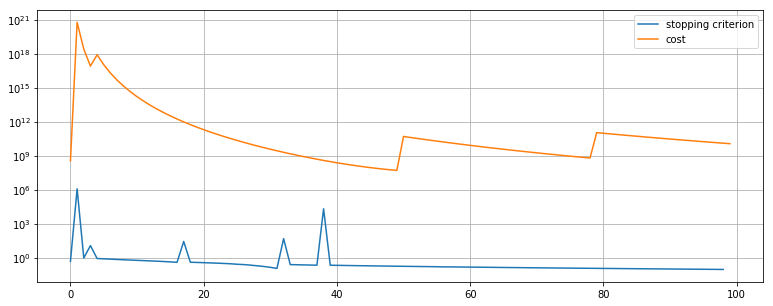

In [120]:
plt.figure(figsize=(13,5))
plt.plot(opt_ref['stop'], label='stopping criterion')
plt.grid()
plt.yscale('log')
plt.plot(opt_ref['obj'], label='cost')
plt.legend()

The cost gains 6 orders of magnitude... Wtf? 

In [112]:
lims=[20,40]

(20, 40)

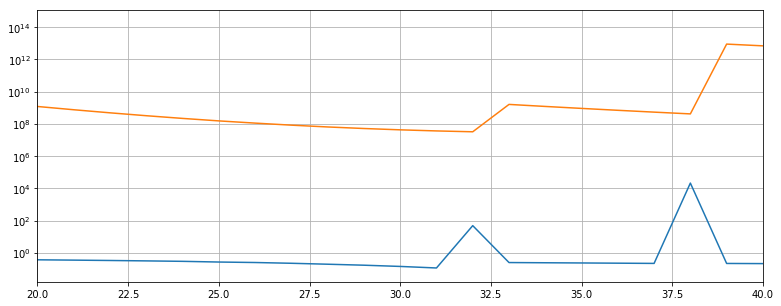

In [113]:
plt.figure(figsize=(13,5))
plt.plot(opt_ref['stop'])
plt.grid()
plt.yscale('log')
plt.plot(opt_ref['obj'])
plt.xlim(lims)

6 oom !!

# Understanding the bumps by reconstructing the history of total cost

In [13]:
from result_analysis import plot_edge_attrs

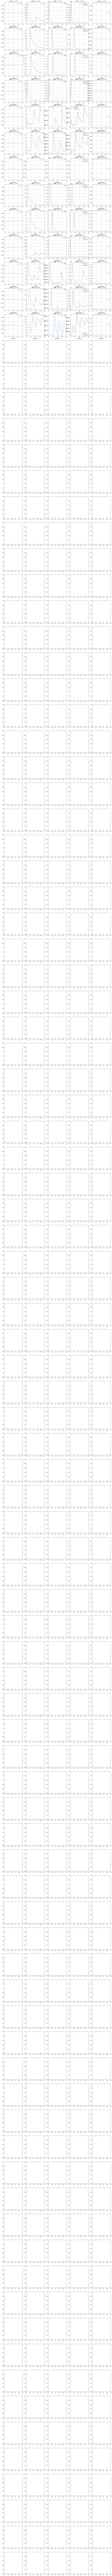

In [124]:
attrs=['f_m', 'f_r','cost','tot_cost','k']
tot_cost, tot_cost_2 = plot_edge_attrs(G_FW[5],None,attrs,dots=False,lims=[0,20], ri_=ri_FW[5], only_R=True)

In [94]:
G_FW[0]

In [104]:
#compare k and r
r_=[]
k_=[]
r_n=[]
node='16'
n=len(G_FW)
for i in range(1,n):
    G=G_FW[i][0]
    k_.append(G[node]['R']['k'])
    r_.append(ri_FW[i][node])
    r_n.append(G.nodes[node]['ri'])

In [102]:
len(ri_FW)

51

In [103]:
len(G_FW)

51

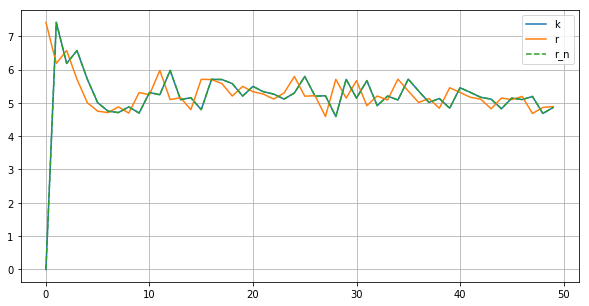

In [106]:
plt.figure(figsize=(10,5))
plt.plot(k_,label='k')
plt.plot(r_,label='r')
plt.plot(r_n,'--',label='r_n')
plt.grid()
plt.legend()

In [116]:
diff=tot_cost-tot_cost_2
diff=diff[:,1:]
print(np.linalg.norm(diff))

nan


In [117]:
np.nansum(np.abs(diff))

0.0

In [118]:
tot_cost_reconstructed=np.nansum(tot_cost,axis=0)

tot_cost_reconstructed_2=np.nansum(tot_cost_2,axis=0)

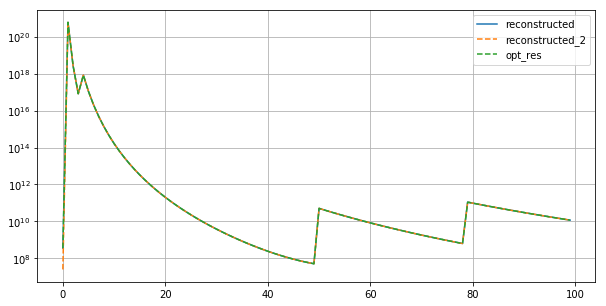

In [125]:
plt.figure(figsize=(10,5))
plt.plot(tot_cost_reconstructed,label='reconstructed')
plt.grid()
plt.plot(tot_cost_reconstructed_2, '--',label='reconstructed_2')
plt.plot(opt_res[4]['obj'],'--',label="opt_res")
plt.yscale('log')
plt.legend()
# plt.xlim([0,2])

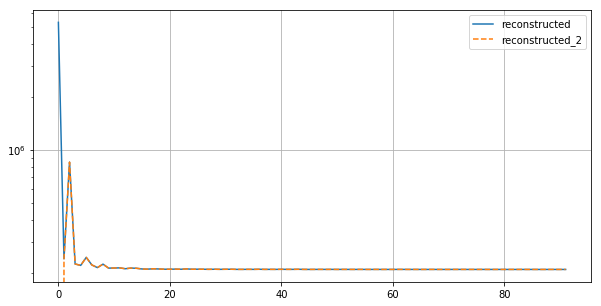

In [59]:
plt.figure(figsize=(10,5))
plt.plot(tot_cost_reconstructed,label='reconstructed')
plt.grid()
plt.plot(tot_cost_reconstructed_2, '--',label='reconstructed_2')
# plt.plot(opt_ref['obj'],'--',label="opt_res")
plt.yscale('log')
plt.legend()

In [54]:
diff_2=opt_ref['obj'][:92]-tot_cost_reconstructed

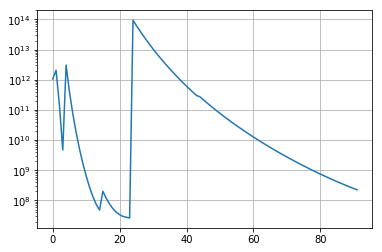

In [56]:
plt.plot(diff_2)
plt.grid()
plt.yscale('log')

Does the sum match what we plot? `

When plotting the total cost from the loops and afterwards, they seem to match
Have to compare more in details, but they seem to match. 

So therefore 
- comparison
- potentially the rebalancing edges that are problematic? If they have a non zero flow? 

I really do not see what is causing those bumps. The total cost is a direct function of the edge costs -- and of flows. I can't see any jump. I would have to decompose the total cost per edge and see where the jump is... As the cost is a direct function of the total flows, and I really can't see any bumps that would cause it to jump. 

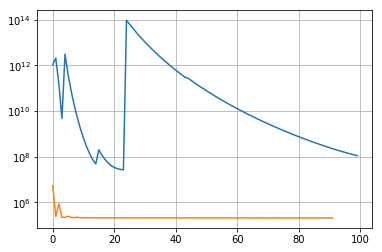

In [57]:
plt.figure()
plt.plot(opt_ref['obj'])
plt.plot(np.nansum(tot_cost,axis=0))
plt.grid()
plt.yscale('log')

## Doing this with the already implemented routine

In [62]:
from helpers_icu import Value_Total_Cost

In [63]:
obj_vec=[]
for G in G_ref:
    obj_, _ = Value_Total_Cost(G)
    obj_vec.append(obj_)

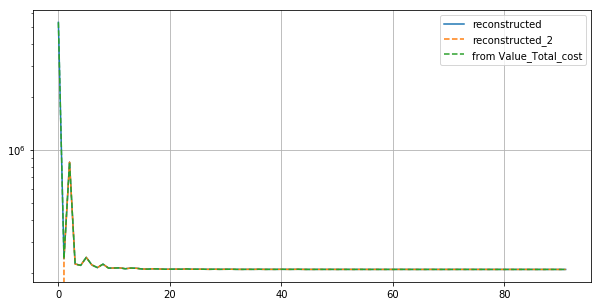

In [65]:
plt.figure(figsize=(10,5))
plt.plot(tot_cost_reconstructed,label='reconstructed')
plt.grid()
plt.plot(tot_cost_reconstructed_2, '--',label='reconstructed_2')
plt.plot(obj_vec,'--',label="from Value_Total_cost")
plt.yscale('log')
plt.legend()

## Would it come from the rebalancing edges? 

No I don't think so. They are properly updated

In [104]:
#compare k and r
r_=[]
k_=[]
r_n=[]
node='16'
n=len(G_FW)
for i in range(1,n):
    G=G_FW[i][0]
    k_.append(G[node]['R']['k'])
    r_.append(ri_FW[i][node])
    r_n.append(G.nodes[node]['ri'])

In [102]:
len(ri_FW)

51

In [103]:
len(G_FW)

51

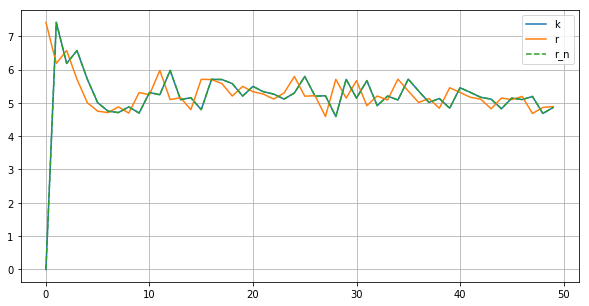

In [106]:
plt.figure(figsize=(10,5))
plt.plot(k_,label='k')
plt.plot(r_,label='r')
plt.plot(r_n,'--',label='r_n')
plt.grid()
plt.legend()

## Conclusion

They all match -- There must be a mistake when running the algorithm!!

OR! simply the edges are not properly updated for some reason?

# Understanding the bumps by comparing their origin with the two different stopping criteria

If we have bumps, we should have them with both stopping criteria. No reason that they would appear with one and not the other... 

In [27]:
n_nodes=25
subfolder='comparison_sc'

In [28]:
path_sc='Data/'+str(n_nodes)+'Nodes/outputs/rel_prog/'+subfolder

In [29]:
print(os.listdir(path_sc))

['.DS_Store', 'output_L_10000_ni_5000_no_10_ev_0_duality_gap.pkl', 'output_L_10000_ni_5000_no_10_ev_0_relative_progress.pkl']


## Printing the stopping criterion and the total cost at each outer iteration for sc = Duality Gap

In [31]:
filename=os.listdir(path_sc)[1]
print(filename)

with open(os.path.join(path_sc, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_10_ev_0_duality_gap.pkl


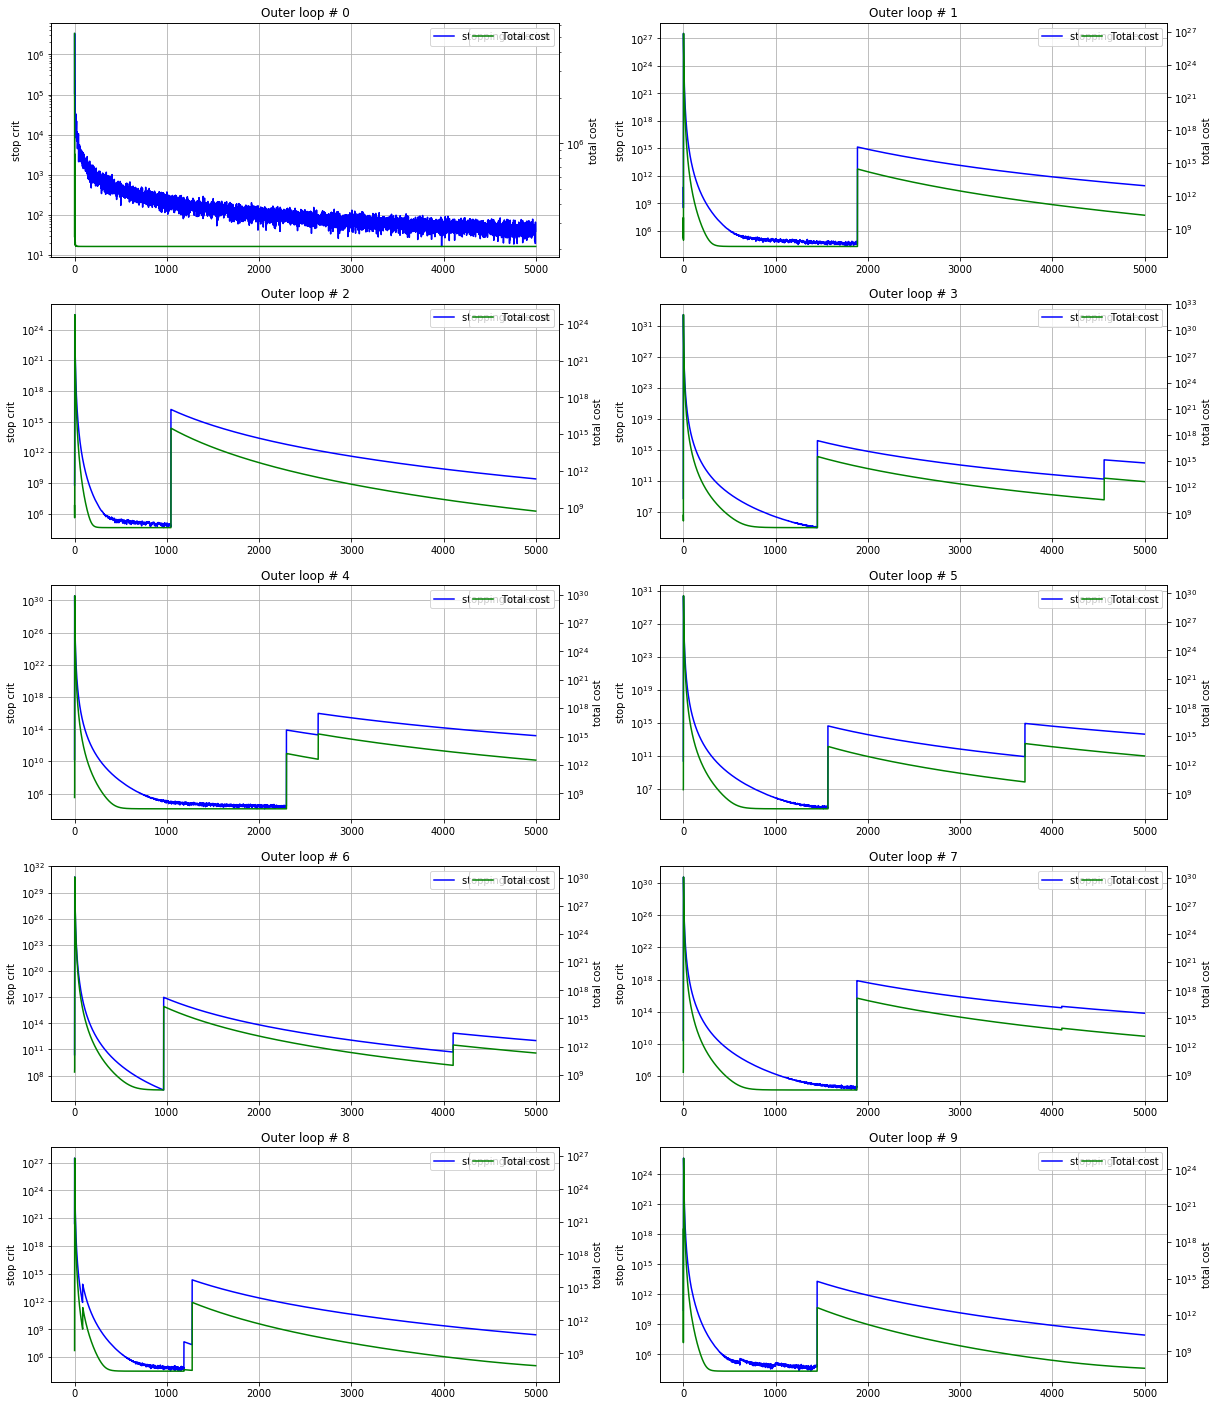

In [32]:
plot_stop_and_cost(opt_res)

## Printing the stopping criterion and the total cost at each outer iteration for sc = relative progress

In [33]:
filename=os.listdir(path_sc)[2]
print(filename)

with open(os.path.join(path_sc, filename), 'rb') as f:
        G_FW, OD, ri_FW, n_outer, n_inner, balance, opt_res, OD_list = pickle.load(f)

output_L_10000_ni_5000_no_10_ev_0_relative_progress.pkl


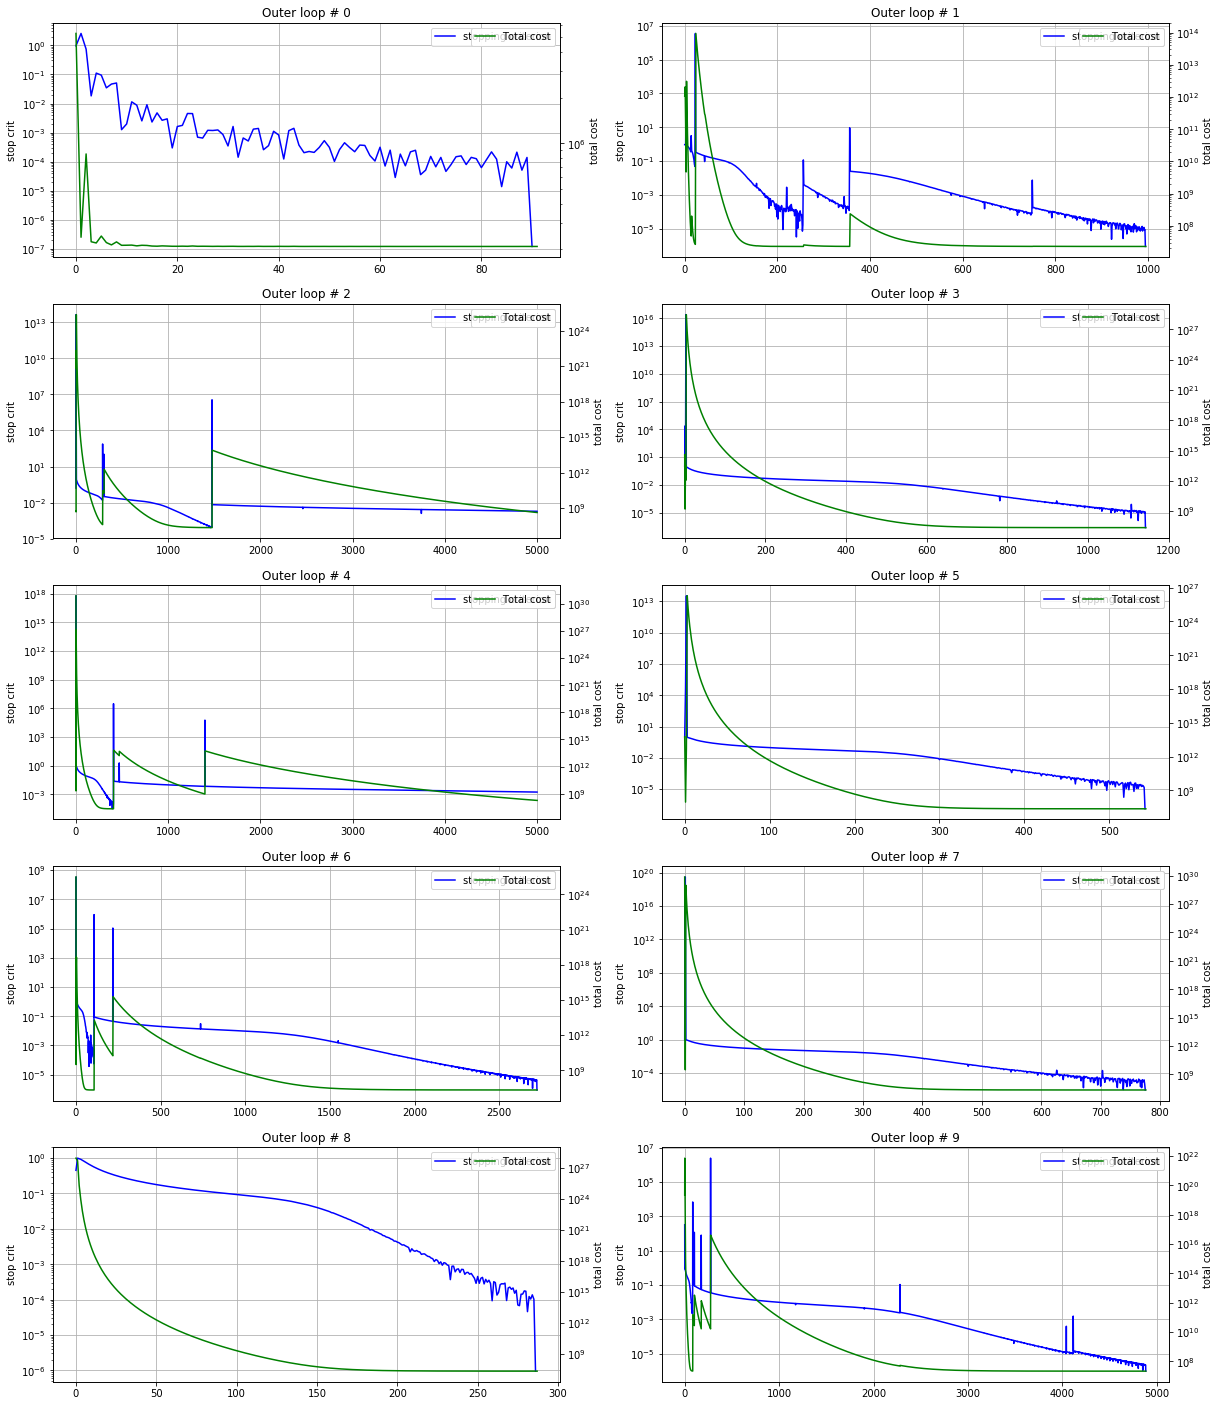

In [34]:
plot_stop_and_cost(opt_res)

## Conclusion

The bumps are present in both stopping criteria (which make sense). 

The reason why I though there were not bumps in the DG stopping criterion is because it seems to have steady decrease. The main reason is that we always run for the NI number of iterations (and therefore has more time to really decrease). 